In [3]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

In [4]:
import tensorflow as tf

In [5]:
import pickle
import numpy as np
train_images = pickle.load(open("/kaggle/input/train-dataset/full_CNN_train.p", "rb" ))

labels = pickle.load(open("/kaggle/input/train-dataset/full_CNN_labels.p", "rb" ))

# Make into arrays as the neural network wants these
train_images = np.array(train_images)
labels = np.array(labels)

In [6]:
# Normalize labels 
labels= labels/255

train_images, labels = shuffle(train_images, labels)

X_train, X_val, y_train, y_val = train_test_split(train_images, labels, test_size=0.128)

# Batch size, epochs and pool size below are all paramaters to fiddle with for optimization
batch_size = 128
epochs = 25
pool_size = (2, 2)
input_shape = X_train.shape[1:]

In [7]:
train_datagen = ImageDataGenerator(channel_shift_range=0.2)
train_datagen.fit(X_train)

In [8]:
model=tf.keras.models.Sequential([
# Normalizes incoming inputs. First layer needs the input shape to work
tf.keras.layers.BatchNormalization(input_shape=input_shape),
tf.keras.layers.Conv2D(8, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv1'),
tf.keras.layers.Conv2D(16, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv2'),
# Pooling 1
tf.keras.layers.MaxPooling2D(pool_size=pool_size),

tf.keras.layers.Conv2D(16, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv3'),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Conv2D(32, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv4'),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Conv2D(32, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv5'),
tf.keras.layers.Dropout(0.2),
 # Pooling 2
tf.keras.layers.MaxPooling2D(pool_size=pool_size),

tf.keras.layers.Conv2D(64, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv6'),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Conv2D(64, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv7'),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Conv2D(64, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv8'),
# Pooling 3
tf.keras.layers.MaxPooling2D(pool_size=pool_size),
# Upsample 1
tf.keras.layers.UpSampling2D(size=pool_size),
#Deconv
tf.keras.layers.Conv2DTranspose(128, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Deconv1'),
tf.keras.layers.Conv2DTranspose(64, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Deconv2'),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Conv2DTranspose(64, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Deconv3'),
tf.keras.layers.Dropout(0.25),
# Upsample 2
tf.keras.layers.UpSampling2D(size=pool_size),

tf.keras.layers.Conv2DTranspose(32, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Deconv4'),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Conv2DTranspose(32, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Deconv5'),
# Upsample 3
tf.keras.layers.UpSampling2D(size=pool_size),

tf.keras.layers.Conv2DTranspose(32, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Deconv6'),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Conv2DTranspose(16, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Deconv7'),
tf.keras.layers.Dropout(0.25),
tf.keras.layers.Conv2DTranspose(16, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Deconv8'),
tf.keras.layers.Conv2DTranspose(1, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Deconv9Finalone')
])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/normalization/batch_normalization.py:143: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
# Compiling and training the model
model.compile(optimizer='Adam', loss='mean_squared_error',metrics=['accuracy'])

model.fit(train_datagen.flow(X_train, y_train, batch_size=batch_size), 
          steps_per_epoch=len(X_train) // batch_size,  # Use integer division
          epochs=50, verbose=1, validation_data=(X_val, y_val))


Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1732029853.160421     113 service.cc:145] XLA service 0x7d23e8002650 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1732029853.160556     113 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


 1/86 ━━━━━━━━━━━━━━━━━━━━ 45:52 32s/step - accuracy: 0.8261 - loss: 0.1557

I0000 00:00:1732029880.333325     113 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


86/86 ━━━━━━━━━━━━━━━━━━━━ 69s 433ms/step - accuracy: 0.8525 - loss: 0.1064 - val_accuracy: 0.9480 - val_loss: 0.0259
Epoch 2/50
 1/86 ━━━━━━━━━━━━━━━━━━━━ 8s 95ms/step - accuracy: 0.9476 - loss: 0.0222

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9476 - loss: 0.0222 - val_accuracy: 0.9497 - val_loss: 0.0226
Epoch 3/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 9s 102ms/step - accuracy: 0.9509 - loss: 0.0179 - val_accuracy: 0.9552 - val_loss: 0.0120
Epoch 4/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9571 - loss: 0.0112 - val_accuracy: 0.9553 - val_loss: 0.0122
Epoch 5/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 9s 101ms/step - accuracy: 0.9554 - loss: 0.0115 - val_accuracy: 0.9571 - val_loss: 0.0089
Epoch 6/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9585 - loss: 0.0091 - val_accuracy: 0.9571 - val_loss: 0.0091
Epoch 7/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 9s 101ms/step - accuracy: 0.9566 - loss: 0.0096 - val_accuracy: 0.9575 - val_loss: 0.0087
Epoch 8/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9543 - loss: 0.0104 - val_accuracy: 0.9575 - val_loss: 0.0087
Epoch 9/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 9s 102ms/step - accuracy: 0.9570 - loss: 0.0089 - val_accuracy: 0.9579 - val_loss: 0.

In [10]:
model.trainable = False
model.save('lanemodel.h5')

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization             │ (None, 80, 160, 3)     │            12 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv1 (Conv2D)                  │ (None, 78, 158, 8)     │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv2 (Conv2D)                  │ (None, 76, 156, 16)    │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 38, 78, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv3 (Conv2D)                  │ (None, 36, 76, 16)     │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 36, 76, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv4 (Conv2D)                  │ (None, 34, 74, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 34, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv5 (Conv2D)                  │ (None, 32, 72, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32, 72, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 36, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv6 (Conv2D)                  │ (None, 14, 34, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 14, 34, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv7 (Conv2D)                  │ (None, 12, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 12, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv8 (Conv2D)                  │ (None, 10, 30, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 5, 15, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 10, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Deconv1 (Conv2DTranspose)       │ (None, 12, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Deconv2 (Conv2DTranspose)       │ (None, 14, 34, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 14, 34, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Deconv3 (Conv2DTranspose)       │ (None, 16, 36, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 16, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 32, 72, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 1,015,757 (3.87 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 338,589 (1.29 MB)

 Optimizer params: 677,168 (2.58 MB)

In [12]:
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)  # For multi-class classification


52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step


In [35]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Assuming y_val contains true labels and y_pred_classes contains predicted labels

# 1. Calculate Accuracy
accuracy = accuracy_score(y_val, y_pred_classes)
print(f"Accuracy: {accuracy}")

# 2. Calculate F1-score (macro average for multi-class, weighted for class imbalance)
f1 = f1_score(y_val, y_pred_classes, average='macro')  # You can change 'macro' to 'weighted'
print(f"F1-score: {f1}")

# 3. Calculate Precision and Recall
precision = precision_score(y_val, y_pred_classes, average='macro', zero_division=1)  # Set zero_division as needed
recall = recall_score(y_val, y_pred_classes, average='macro')

print(f"Precision: {precision}")
print(f"Recall: {recall}")




Accuracy: 0.32018818849449204
F1-score: 0.10417732105803972
Precision: 0.22625467715740333
Recall: 0.11245082624540426


In [78]:
import numpy as np
import cv2
from keras.models import load_model
import matplotlib.pyplot as plt


In [79]:
from keras.models import load_model

# Load your trained model
model = load_model('/kaggle/working/lanemodel2.h5')


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 575ms/step


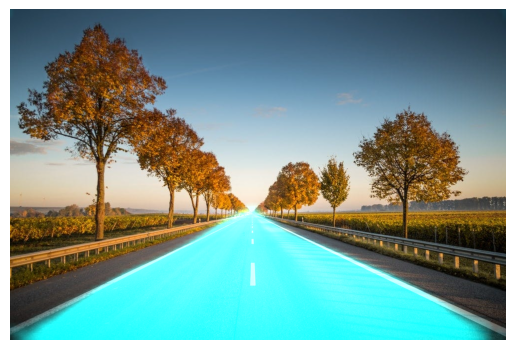

Image saved as output_image.jpg
(667, 1000, 3)


In [ ]:
import cv2
import numpy as np
from keras.models import load_model
from keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt



class Lanes:
    def __init__(self):
        self.recent_fit = []
        self.avg_fit = []

def road_lines(image, model, lanes):
    
    image_shape = image.shape

    # Get image ready for feeding into model
    small_img = cv2.resize(image, (160, 80))  # Resize to (160, 80) based on your model input size
    small_img = np.array(small_img)
    small_img = small_img[None, :, :, :]  # Add batch dimension

    # Make prediction with the neural network (un-normalize value by multiplying by 255)
    prediction = model.predict(small_img)[0] * 255

    # Add lane prediction to list for averaging
    lanes.recent_fit.append(prediction)

    # Only use the last five for averaging
    if len(lanes.recent_fit) > 5:
        lanes.recent_fit = lanes.recent_fit[1:]
    
    lanes.avg_fit = np.mean(np.array([i for i in lanes.recent_fit]), axis=0)

    # Generate fake R & B color dimensions, stack with G (Green for lane)
    blanks = np.zeros_like(lanes.avg_fit).astype(np.uint8)

    # Set different color for the detection (Green for lanes)
    lane_drawn = np.dstack((lanes.avg_fit, lanes.avg_fit, blanks))

    # Re-size to match the original image
    lane_image = cv2.resize(lane_drawn, (image_shape[1], image_shape[0]), interpolation=cv2.INTER_LINEAR)

    # Ensure both images have the same type before using addWeighted
    image = image.astype(np.uint8)
    lane_image = lane_image.astype(np.uint8)

    # Merge the lane drawing onto the original image
    result = cv2.addWeighted(image, 1, lane_image, 1, 0)

    return result

# Load your trained model
model = load_model('/kaggle/working/lanemodel2.h5')  # Replace with your model's actual path

# Load image
image_path = '/kaggle/input/image1/0_b5ptHu0y7wUeMddy.jpg'  # Replace with your image file path
image = cv2.imread(image_path)

# Create lanes object
lanes = Lanes()

# Call the road_lines function for lane detection on the image
result_image = road_lines(image, model, lanes)


# Show the result image using matplotlib (no need for OpenCV's imshow)
plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct display
plt.axis('off')  # Turn off axis labels
plt.show()
cv2.imwrite('output_image.jpg', result_image)  # Save output image

print("Image saved as output_image.jpg")
print(result_image.shape)  # Check the shape of the result image


In [2]:
import cv2
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Define Fuzzy Variables for Linearity Classification
linearity = ctrl.Antecedent(np.arange(0, 101, 1), 'linearity')  # 0: Highly Curved, 100: Straight
lane_type = ctrl.Consequent(np.arange(0, 101, 1), 'lane_type')  # 0: Highly Curved, 100: Straight Lane

# Membership Functions for Linearity
linearity['highly_curved'] = fuzz.trimf(linearity.universe, [0, 0, 40])
linearity['slightly_curved'] = fuzz.trimf(linearity.universe, [20, 50, 80])
linearity['straight'] = fuzz.trimf(linearity.universe, [60, 100, 100])

# Membership Functions for Lane Type
lane_type['highly_curved'] = fuzz.trimf(lane_type.universe, [0, 0, 40])
lane_type['slightly_curved'] = fuzz.trimf(lane_type.universe, [20, 50, 80])
lane_type['straight'] = fuzz.trimf(lane_type.universe, [60, 100, 100])

# Fuzzy Rules
rule1 = ctrl.Rule(linearity['highly_curved'], lane_type['highly_curved'])
rule2 = ctrl.Rule(linearity['slightly_curved'], lane_type['slightly_curved'])
rule3 = ctrl.Rule(linearity['straight'], lane_type['straight'])

# Fuzzy Control System
lane_type_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
lane_type_system = ctrl.ControlSystemSimulation(lane_type_ctrl)

# Function to Classify Lane Type
def classify_lane(image):
    # Preprocessing: Assume the lane is already detected in binary format (white = lane, black = background)
    contours, _ = cv2.findContours(image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    if len(contours) > 0:
        # Fit a line to the largest contour
        largest_contour = max(contours, key=cv2.contourArea)
        [vx, vy, x, y] = cv2.fitLine(largest_contour, cv2.DIST_L2, 0, 0.01, 0.01)

        # Calculate linearity score
        # vx, vy represent the direction vector of the line
        angle = np.arctan2(vy, vx) * 180 / np.pi
        linearity_score = 100 - abs(angle)  # Smaller angles indicate straighter lines

        # Input linearity score into fuzzy system
        lane_type_system.input['linearity'] = linearity_score
        lane_type_system.compute()
        lane_score = lane_type_system.output['lane_type']
        
        # Determine lane type
        if lane_score < 40:
            print("Detected Lane Type: Highly Curved")
            lane_type_label = "Highly Curved"
        elif 40 <= lane_score < 80:
            print("Detected Lane Type: Slightly Curved")
            lane_type_label = "Slightly Curved"
        else:
            print("Detected Lane Type: Straight")
            lane_type_label = "Straight"
        
        return lane_type_label, image
    else:
        print("No Lane Detected!")
        return "No Lane", image

# Example Usage
image_path = 'F:\Soft computing/PROJECT - 1/Main-Lane-Detection/output_image1.jpg'  # Input a binary image with detected lanes
binary_lane_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Binary format (0 or 255)
result, processed_image = classify_lane(binary_lane_image)

# Display Result
print("Lane Classification Result:", result)
cv2.waitKey(0)
cv2.destroyAllWindows()


Detected Lane Type: Straight
Lane Classification Result: Straight
